In [373]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## connection to the database

In [374]:
con = sqlite3.connect("../data/checking-logs.sqlite")

 ##  datetime from the pageviews table

In [375]:
df = pd.io.sql.read_sql(
    sql="SELECT datetime FROM pageviews WHERE uid LIKE 'user_%'", 
    parse_dates=['datetime'],
    con=con
)
df2 = pd.io.sql.read_sql(
    sql="SELECT timestamp FROM checker WHERE uid LIKE 'user_%'", 
    parse_dates=['timestamp'],
    con=con
)

##  a new dataframe where the visits are counted and grouped by date

In [376]:
df = df.groupby([df['datetime'].dt.date]).count()
df2 = df2.groupby([df2['timestamp'].dt.date]).count()
df.columns = ["views"]
df2.columns = ["commits"]
df.index.name = 'date'
df2.index.name = 'date'
new_df = pd.concat([df, df2], axis=1).dropna()

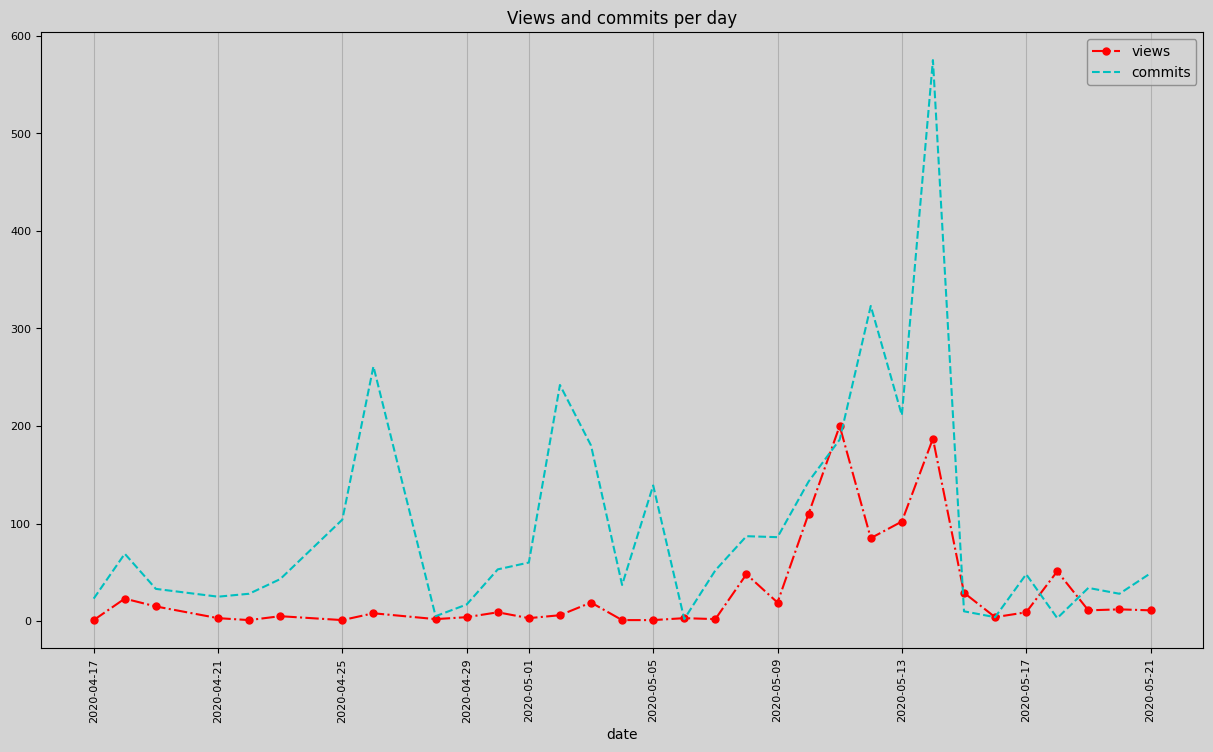

In [380]:
ax = new_df.plot(markersize=10, style=['r.-.', 'c--'], fontsize=8, figsize=(15,8), title='Views and commits per day', rot=90)
ax.grid(axis='x')
ax.set_facecolor(color='lightgray')
ax.figure.set_facecolor(color='lightgray')
ax.legend(facecolor='lightgray', edgecolor='gray')

## Close connection

In [378]:
con.close()

## How many times was the number of views larger than 150?
The answer is 2